## Annual Average

Let's now begin with plotting the annual averages per unit of latitude and longitude. We should start by loading the data.

In [12]:
import xarray as xarr

# open datafile
dataFile = "./data/clipped_monthly_single_1988.nc"
data = xarr.open_dataset(dataFile)

# kelvin to celsius
data["t_celsius"] = data['t2m'] - 273.15

[[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 ...

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan n

Let's now calculate the annual averages across the nation.

In [2]:
# calculate averages across continental US
mean_temp = data['t_celsius'].mean(dim='valid_time')
mean_precipitation = data['tp'].mean(dim='valid_time')

We can now proceed to calculate the spatial averages, weighing each data point in proportion to the area of the associated grid cell. For precipitation, a better metric would be the cumulative sum of all preciptiation across the United States.

In [3]:
from cdo import Cdo
cdo = Cdo()

outputFile = "./data/spatial_avgs.nc"
spatial_averages = cdo.fldmean(input=dataFile, output=outputFile)
spatial_avgs = xarr.open_dataset(outputFile)

precipitation_timeseries = spatial_avgs["tp"].squeeze()
temp_timeseries = (spatial_avgs["t2m"] - 273.15).squeeze() # convert to 1D

Now, let's plot the annual average temperature across the continental United States.

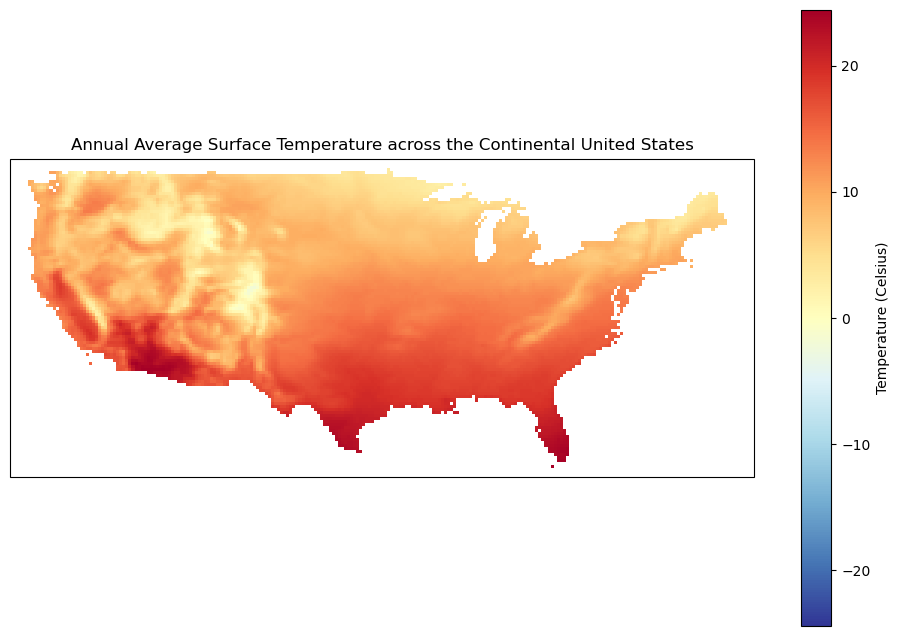

In [4]:
import matplotlib.pyplot as plot
import cartopy.crs as ccrs

# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
temp_plot = mean_temp.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", add_colorbar=True)
temp_plot.colorbar.set_label("Temperature (Celsius)")

# plot, show
plot.title("Annual Average Surface Temperature across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Precipitation_Monthly_1988.png")
plot.show()

Then, let's do the average precipitation.

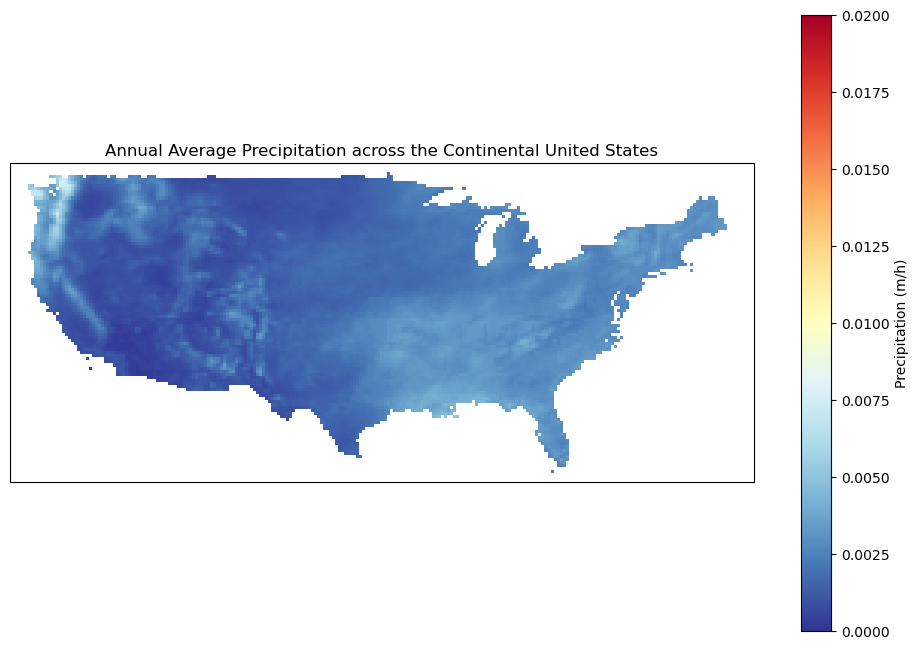

In [5]:
# declare figure
theFigure = plot.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# make map, adjust colorbar
precipitation_plot = mean_precipitation.plot(transform=ccrs.PlateCarree(), cmap="RdYlBu_r", vmin=0, vmax=0.02, add_colorbar=True)
precipitation_plot.colorbar.set_label("Precipitation (m/h)")

# plot, show
plot.title("Annual Average Precipitation across the Continental United States")
plot.savefig("./plots/Annual_Average_Surface_Temp_Monthly_1988.png")
plot.show()

Now let's make the time series for temperature.

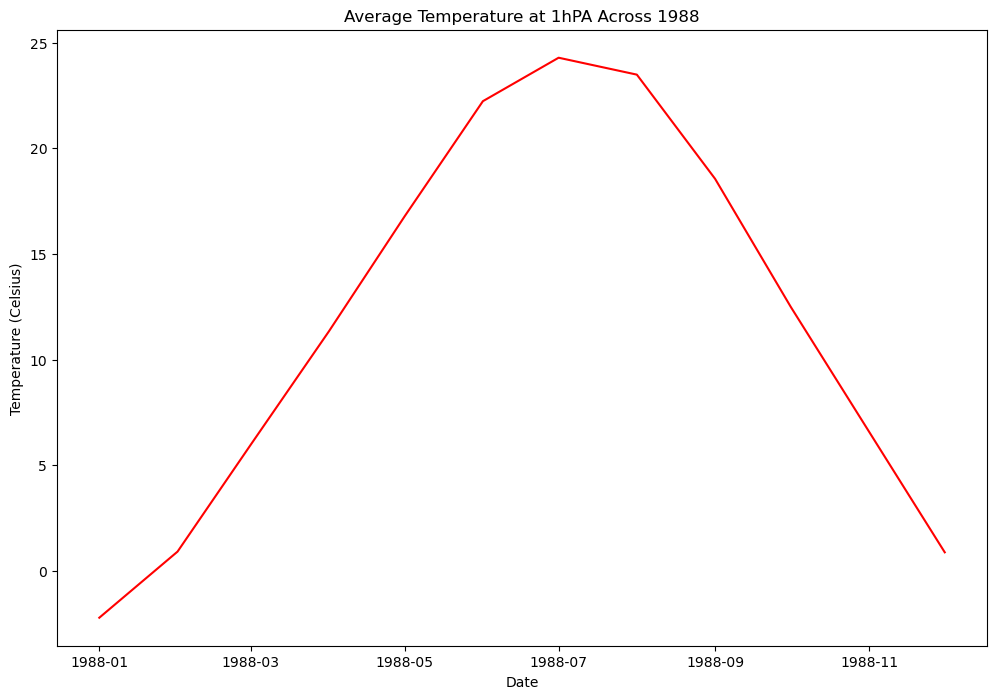

In [6]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

# remove null values
temp_timeseries = temp_timeseries.dropna(dim="valid_time") # it's in 1D so drop the first dimension


# need to pass in the times, and then the data
plot.plot(temp_timeseries.valid_time, temp_timeseries, color="red")

# labels
plot.ylabel("Temperature (Celsius)")
plot.xlabel("Date")
plot.title("Average Temperature at 1hPA Across 1988")
plot.savefig("./plots/Annual_Average_Temperature_1hPa_TimeSeries_CONUS_1988.png")
plot.show()

Finally, we can do the same for the cumulative precipitation.

<xarray.DataArray 'tp' (valid_time: 24)> Size: 96B
array([     nan, 0.001803,      nan, 0.00146 ,      nan, 0.002031,      nan,
       0.002294,      nan, 0.002055,      nan, 0.001496,      nan, 0.002262,
            nan, 0.002325,      nan, 0.002593,      nan, 0.001256,      nan,
       0.002752,      nan, 0.001536], dtype=float32)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 192B 1988-01-01 ... 1988-12-01T06...
    lon         float64 8B 0.0
    lat         float64 8B 0.0
Attributes: (12/32)
    standard_name:                            unknown
    long_name:                                Total precipitation
    units:                                    m
    GRIB_paramId:                             228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      25725
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                Total

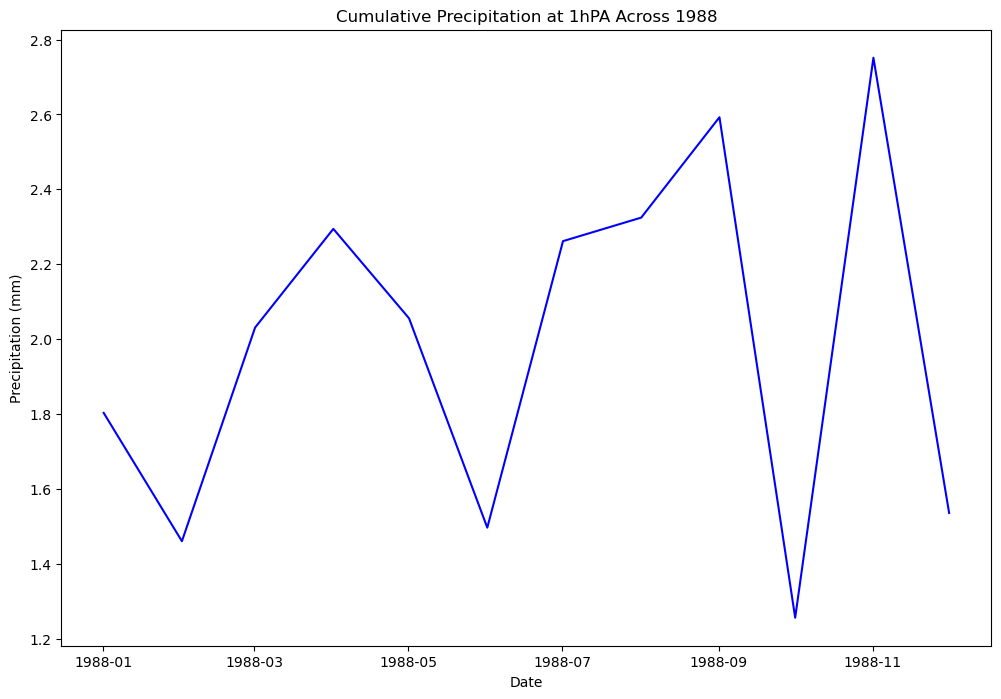

In [10]:
# create figure
theFigure = plot.subplots(figsize=(12,8))

precipitation_timeseries = precipitation_timeseries.dropna(dim='valid_time') # drop NaN values

# need to pass in the times, and then the data
plot.plot(precipitation_timeseries.valid_time, precipitation_timeseries * 1000, color="blue")

# labels
plot.ylabel("Precipitation (mm)")
plot.xlabel("Date")
plot.title("Cumulative Precipitation at 1hPA Across 1988")
plot.savefig("./plots/Cumulative_Precipitation_Surface_TimeSeries_CONUS_1988.png")
plot.show()